### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [6]:
data['height'].unique()

array([1.72, 1.68, 1.98, 1.83, 1.81, 1.8 , 2.05, 1.93, 1.65, 1.7 , 1.75,
        nan, 1.61, 1.78, 1.76, 2.1 , 1.73, 1.85, 1.77, 1.9 , 1.86, 1.74,
       1.6 , 2.07, 1.88, 1.66, 1.62, 1.87, 2.03, 1.69, 1.82, 1.89, 1.94,
       1.95, 1.71, 1.84, 1.91, 1.67, 2.02, 1.58, 1.63, 1.79, 1.97, 1.56,
       1.55, 1.57, 1.46, 1.92, 1.64, 1.53, 1.99, 1.96, 2.  , 2.04, 1.47,
       1.52, 2.01, 1.51, 1.59, 2.08, 1.37, 1.5 , 1.45, 2.06, 1.54, 2.11,
       1.43, 1.49, 1.33, 1.48, 1.44, 2.13, 2.09, 2.21, 2.18, 1.21, 1.38,
       1.34, 2.15, 2.17, 1.42, 1.4 , 2.14])

In [7]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
# Проверяем пропуски
print("Пропуски в данных:")
print(data.isnull().sum())

# Удаляем строки с пропусками в ключевых признаках
data = data.dropna(subset=['height', 'weight', 'gold', 'silver', 'bronze'])

print(f"Осталось строк: {len(data)}")

from sklearn.preprocessing import LabelEncoder

# Кодируем целевую переменную 'sex'
le_sex = LabelEncoder()
y = le_sex.fit_transform(data['sex'])

# Подготавливаем признаки X (только числовые)
X = data[['height', 'weight', 'gold', 'silver', 'bronze']].copy()

print(f"X shape: {X.shape}, y shape: {y.shape}")

Пропуски в данных:
id             0
name           0
nationality    0
sex            0
dob            0
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64
Осталось строк: 10858
X shape: (10858, 5), y shape: (10858,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: X={X_train.shape}, y={y_train.shape}")
print(f"Test: X={X_test.shape}, y={y_test.shape}")

Train: X=(8686, 5), y=(8686,)
Test: X=(2172, 5), y=(2172,)


### Строим модель

In [13]:
features_columns = [c for c in data.columns if c != 'sex']
X = data[features_columns]
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [14]:
y = data['sex']

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [16]:
ft = ohe.fit_transform(data[['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']])

In [17]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [18]:
le.fit( data['sex'] )

LabelEncoder()

In [19]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [20]:
model = LogisticRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


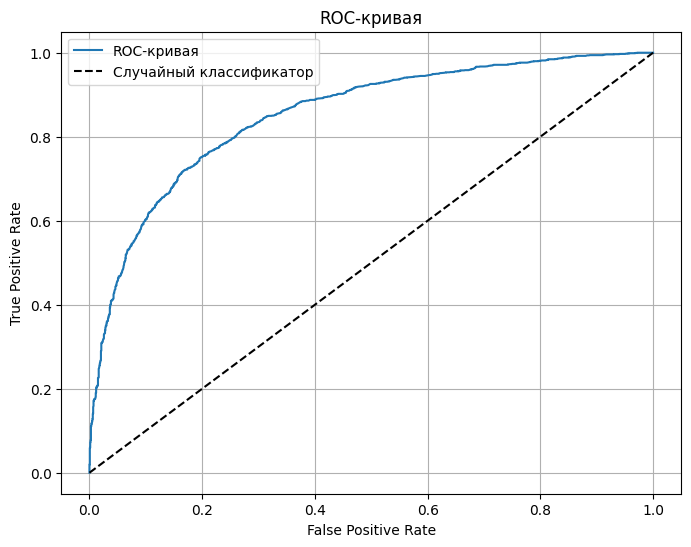

In [25]:
from sklearn.metrics import roc_curve

# Получаем вероятности для положительного класса
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Рассчитываем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Визуализация
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC-кривая')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

# Вычисляем AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC score: {roc_auc:.4f}")

ROC-AUC score: 0.8520


In [27]:
def manual_roc_curve(y_true, y_pred_prob, thresholds=None):
    """
    Ручной расчет TPR и FPR для различных порогов
    """
    if thresholds is None:
        # Используем уникальные вероятности как пороги
        thresholds = np.sort(np.unique(y_pred_prob))
        thresholds = np.append(thresholds, thresholds[-1] + 0.01)  # добавляем максимальный порог

    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        # Бинаризация предсказаний по порогу
        y_pred = (y_pred_prob >= threshold).astype(int)

        # Расчет TP, FP, TN, FN
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        # Расчет TPR (Recall, Sensitivity)
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Расчет FPR
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(fpr_list), np.array(tpr_list), thresholds


# Используем ручную функцию
fpr_manual, tpr_manual, thresholds_manual = manual_roc_curve(y_test, y_pred_prob)

print("Примеры расчетов:")
print(f"Количество порогов: {len(thresholds_manual)}")
print(f"TPR при пороге 0.5: {tpr_manual[np.where(thresholds_manual >= 0.5)[0][0]]:.4f}")
print(f"FPR при пороге 0.5: {fpr_manual[np.where(thresholds_manual >= 0.5)[0][0]]:.4f}")

# Сравнение с sklearn (для проверки)
print(f"\nПроверка - AUC sklearn: {roc_auc_score(y_test, y_pred_prob):.4f}")

Примеры расчетов:
Количество порогов: 1673
TPR при пороге 0.5: 0.7742
FPR при пороге 0.5: 0.2300

Проверка - AUC sklearn: 0.8520


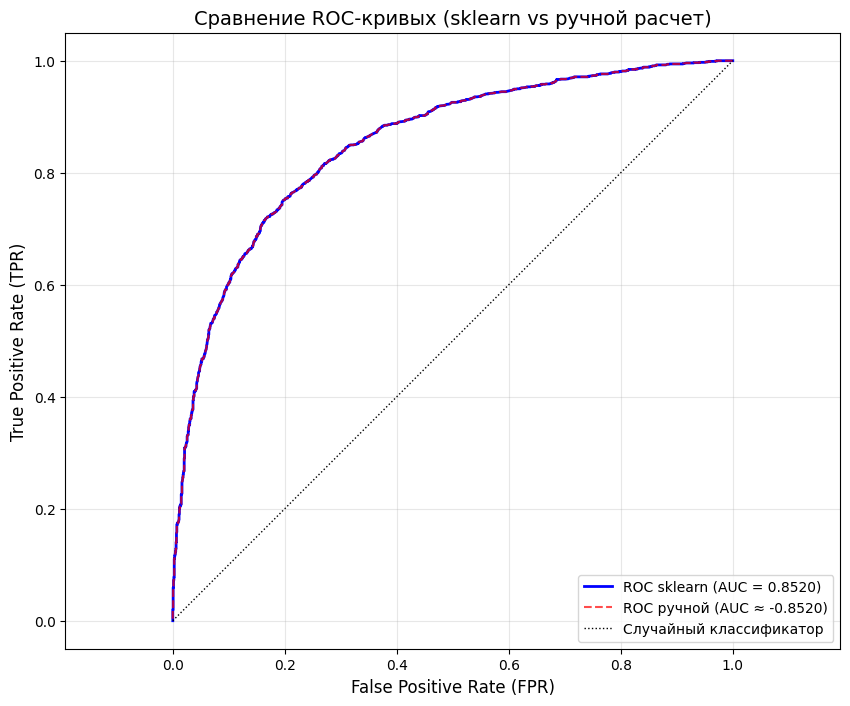


=== СРАВНЕНИЕ МЕТРИК ===
AUC sklearn:              0.851983
AUC ручной (интеграл):    -0.851983
Разница:                  1.703966


In [29]:
plt.figure(figsize=(10, 8))

# ROC-кривая из sklearn (из п.3)
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC sklearn (AUC = {roc_auc_score(y_test, y_pred_prob):.4f})')

# ROC-кривая из ручного расчета (из п.6)
# Используем trapezoid вместо trapz (современный метод)
auc_manual = np.trapezoid(tpr_manual, fpr_manual)
plt.plot(fpr_manual, tpr_manual, 'r--', linewidth=1.5, alpha=0.7, label=f'ROC ручной (AUC ≈ {auc_manual:.4f})')

# Случайный классификатор
plt.plot([0, 1], [0, 1], 'k:', linewidth=1, label='Случайный классификатор')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Сравнение ROC-кривых (sklearn vs ручной расчет)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

print("\n=== СРАВНЕНИЕ МЕТРИК ===")
print(f"AUC sklearn:              {roc_auc_score(y_test, y_pred_prob):.6f}")
print(f"AUC ручной (интеграл):    {auc_manual:.6f}")
print(f"Разница:                  {abs(roc_auc_score(y_test, y_pred_prob) - auc_manual):.6f}")

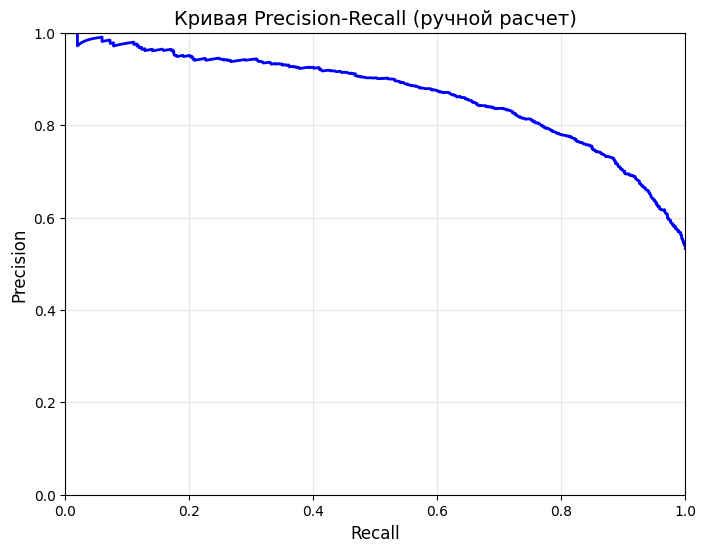

Precision при Recall=0.5: 0.9023


In [30]:

def manual_precision_recall(y_true, y_pred_prob, thresholds=None):
    """
    Ручной расчет Precision и Recall для различных порогов
    """
    if thresholds is None:
        thresholds = np.sort(np.unique(y_pred_prob))
        thresholds = np.append(thresholds, thresholds[-1] + 0.01)

    precision_list = []
    recall_list = []

    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)

        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))

        precision = tp / (tp + fp) if (tp + fp) > 0 else 1
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    return np.array(precision_list), np.array(recall_list), thresholds


# Расчет Precision-Recall
precision_manual, recall_manual, thresholds_pr = manual_precision_recall(y_test, y_pred_prob)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(recall_manual, precision_manual, 'b-', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Кривая Precision-Recall (ручной расчет)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

print(f"Precision при Recall=0.5: {precision_manual[np.argmin(np.abs(recall_manual - 0.5))]:.4f}")

In [31]:
auc_from_manual = np.trapezoid(tpr_manual, fpr_manual)
print(f"AUC из ручных метрик (п.5): {auc_from_manual:.6f}")

AUC из ручных метрик (п.5): -0.851983


In [32]:
print("\n=== ОЦЕНКА КАЧЕСТВА МОДЕЛИ ===")

auc_score = roc_auc_score(y_test, y_pred_prob)

if auc_score > 0.9:
    print("✓ ОТЛИЧНО: AUC > 0.9 - модель имеет высокую разделяющую способность")
    print("  ROC-кривая значительно выше диагонали, модель лучше случайного угадывания")
elif auc_score > 0.8:
    print("✓ ХОРОШО: AUC > 0.8 - модель имеет хорошее качество")
    print("  ROC-кривая заметно выше диагонали")
elif auc_score > 0.7:
    print("✓ УДОВЛЕТВОРИТЕЛЬНО: AUC > 0.7 - модель имеет среднее качество")
    print("  ROC-кривая немного выше диагонали")
elif auc_score > 0.6:
    print("✓ СЛАБО: AUC > 0.6 - модель чуть лучше случайной")
    print("  ROC-кривая близка к диагонали")
else:
    print("✗ ПЛОХО: AUC ≤ 0.6 - модель не лучше случайного угадывания")
    print("  ROC-кривая близка или ниже диагонали")

print(f"\nКонкретные метрики:")
print(f"ROC-AUC = {auc_score:.4f}")
print(f"TPR при FPR=0.2: {tpr[np.argmax(fpr >= 0.2)]:.4f}")
print(f"Precision при Recall=0.5: {precision_manual[np.argmin(np.abs(recall_manual - 0.5))]:.4f}")

print("\nВЫВОД:")
if auc_score > 0.7:
    print("Модель достаточно хорошо предсказывает пол спортсмена по физическим характеристикам")
    print("и наградам. Можно использовать для решения данной задачи.")
else:
    print("Модель имеет низкое качество. Необходимы дополнительные признаки")
    print("или другая модель для улучшения результатов.")


=== ОЦЕНКА КАЧЕСТВА МОДЕЛИ ===
✓ ХОРОШО: AUC > 0.8 - модель имеет хорошее качество
  ROC-кривая заметно выше диагонали

Конкретные метрики:
ROC-AUC = 0.8520
TPR при FPR=0.2: 0.7517
Precision при Recall=0.5: 0.9023

ВЫВОД:
Модель достаточно хорошо предсказывает пол спортсмена по физическим характеристикам
и наградам. Можно использовать для решения данной задачи.


In [23]:
from sklearn.metrics import roc_curve

In [28]:
predictions = model.predict_proba(X_test)

In [29]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

In [30]:
from matplotlib import pyplot as plt

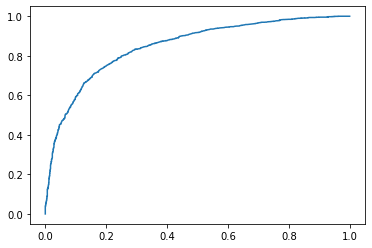

In [31]:
plt.plot( fpr, tpr )

In [32]:
from sklearn.metrics import roc_auc_score

In [34]:
roc_auc_score(y_test, predictions[:, 1])

0.8490614736465769